### STAT 451 - Machine Learning - Fall 2021

### Final Course Project

# Predicting the Survivability of Breast Cancer Patients using Machine Learning

#### Binhao Chen (bchen276@wisc.edu), Jingde Wan (wan38@wisc.edu), Yuning Wu (ywu483@wisc.edu)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from scipy.stats import mode

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Breast_Cancer_METABRIC.csv')
data

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,MTS-T2428,70.05,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,...,NaN,NaN,NaN,4.93,Recurred,Female,NaN,27.0,1.0,NaN
2505,MTS-T2429,63.60,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,...,NaN,NaN,NaN,16.18,Recurred,Female,NaN,28.0,2.0,NaN
2506,MTS-T2430,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN
2507,MTS-T2431,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN


In [3]:
print(data.columns)

Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')


## EDA

In [4]:
# y includes our labels and x includes our features
y = data['Overall Survival Status']                          # Living or Deceased
X = data.drop('Overall Survival Status', axis = 1)
X.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival (Months),PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,140.500000,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,84.633333,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,163.700000,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,164.933333,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,41.366667,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


Number of Living:  1144
Number of Deceased :  837


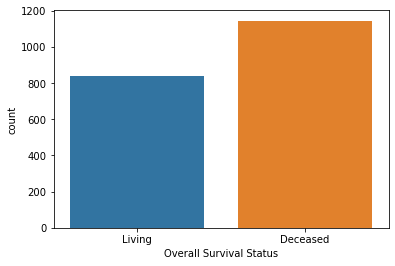

In [5]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
Living, Deceased = y.value_counts()
print('Number of Living: ',Living)
print('Number of Deceased : ',Deceased)

## Data Preprocessing

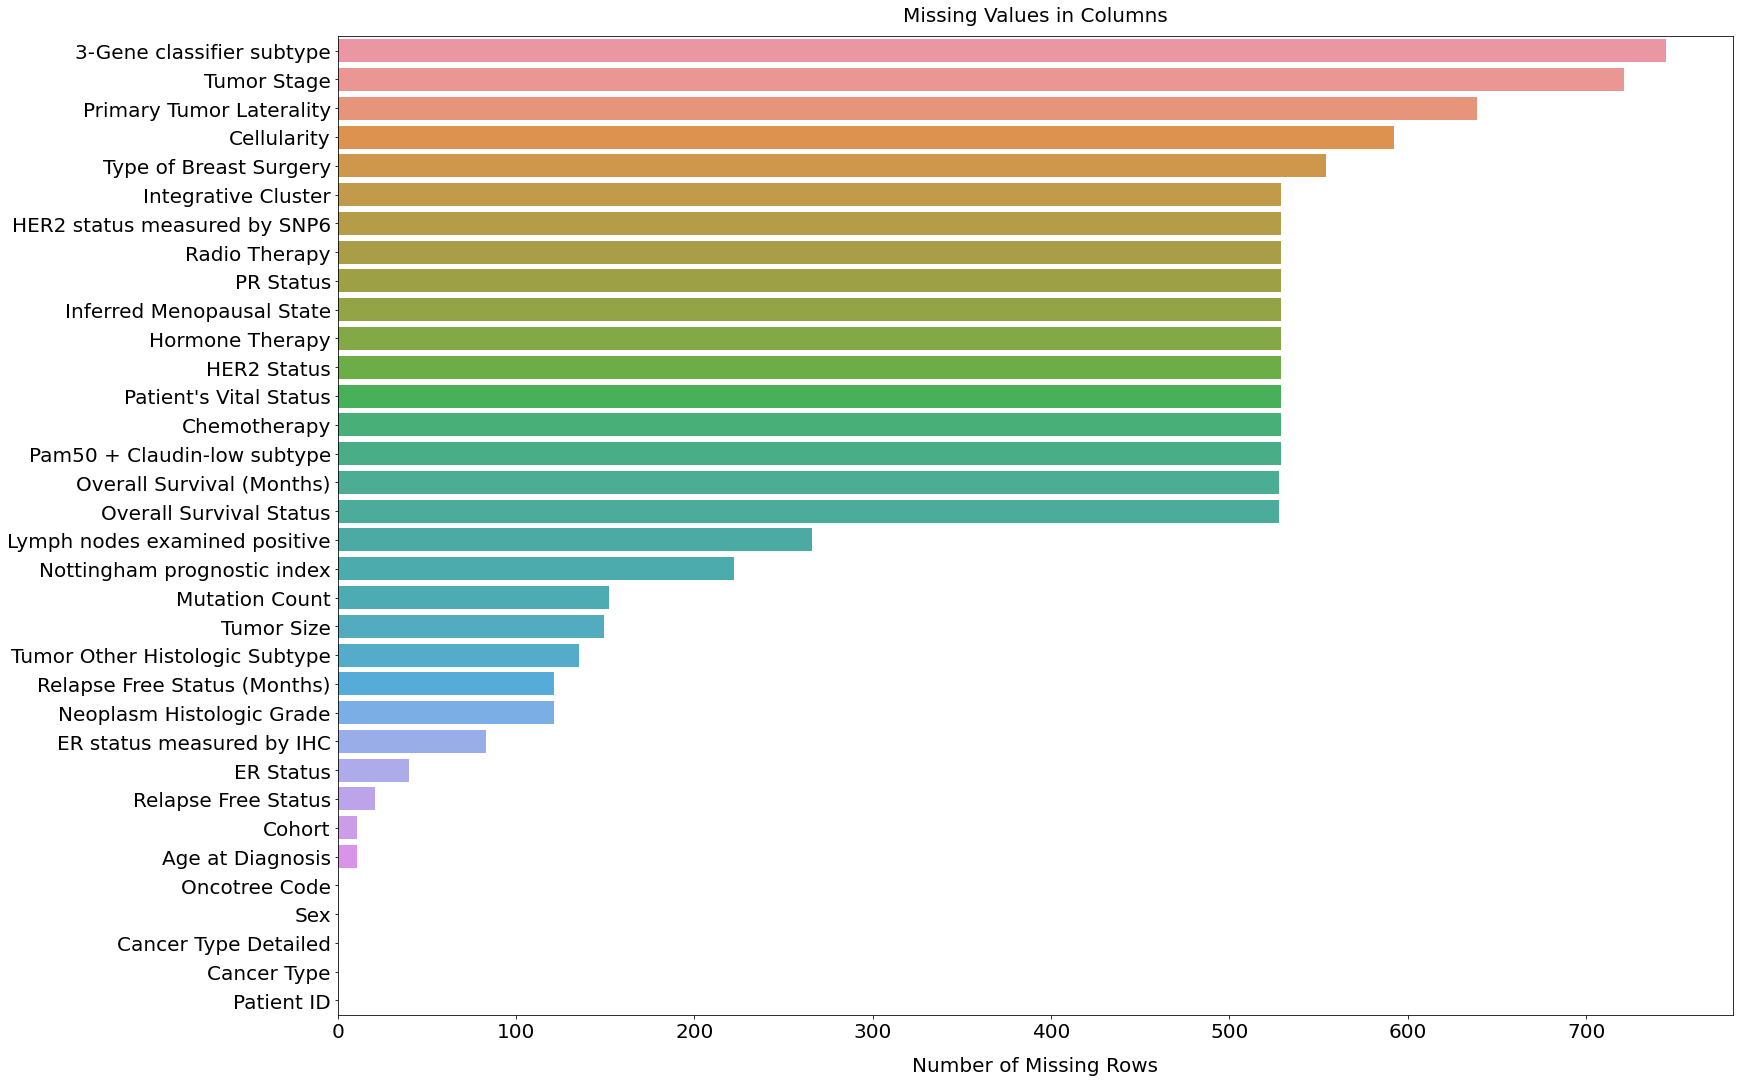

In [6]:
fig = plt.figure(figsize=(25, 18))

sns.barplot(x=data.isnull().sum().sort_values(ascending=False).values,
            y=data.isnull().sum().sort_values(ascending=False).index)
#             palette='Reds_d')

plt.xlabel('Number of Missing Rows', size=20, labelpad=15)
plt.ylabel('')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.title('Missing Values in Columns', size=20, pad=15)

plt.show()

There are 29 columns with missing values and there are no missing value for only 5 columns (Patient ID, Oncotree Code, Cancer Type Detailed, Cancer Type, Sex). Then we need to handle missing values.

In [7]:
# i=0
# for col in data:
#     i = i + 1
#     if data[col].dtype == 'float64':
#         print(i)

In [8]:
# Event and duration columns
data['Relapse Free Status'] = data.groupby(['Cancer Type Detailed'])['Relapse Free Status'].apply(lambda x: x.fillna(mode(x)[0][0]))
data['Relapse Free Status (Months)'] = data.groupby(['Cancer Type Detailed', 'Relapse Free Status'])['Relapse Free Status (Months)'].apply(lambda x: x.fillna(x.mean()))
data['Overall Survival Status'] = data.groupby(['Cancer Type Detailed', 'Relapse Free Status'])['Overall Survival Status'].apply(lambda x: x.fillna(mode(x)[0][0]))
data['Overall Survival (Months)'] = data.groupby(['Cancer Type Detailed', 'Overall Survival Status'])['Overall Survival (Months)'].apply(lambda x: x.fillna(x.mean()))

# ER, PR, HER2 status columns
data['ER status measured by IHC'] = data['ER status measured by IHC'].fillna(mode(data['ER status measured by IHC'])[0][0])
data['ER Status'] = data.groupby(['ER status measured by IHC'])['ER Status'].apply(lambda x: x.fillna(mode(x)[0][0]))
data['HER2 status measured by SNP6'] = data['HER2 status measured by SNP6'].fillna(mode(data['HER2 status measured by SNP6'])[0][0])
data['HER2 Status'] = data.groupby(['HER2 status measured by SNP6'])['HER2 Status'].apply(lambda x: x.fillna(mode(x)[0][0]))
data['PR Status'] = data.groupby(['Cancer Type Detailed'])['PR Status'].apply(lambda x: x.fillna(mode(x)[0][0]))

# Chemotherapy, Hormone Therapy, Radio Therapy columns
data['Chemotherapy'] = data.groupby(['Cancer Type Detailed'])['Chemotherapy'].apply(lambda x: x.fillna(mode(x)[0][0]))
data['Hormone Therapy'] = data.groupby(['Cancer Type Detailed'])['Hormone Therapy'].apply(lambda x: x.fillna(mode(x)[0][0]))
data['Radio Therapy'] = data.groupby(['Cancer Type Detailed'])['Radio Therapy'].apply(lambda x: x.fillna(mode(x)[0][0]))

# Other columns
data['Age at Diagnosis'] = data.groupby(['Cancer Type Detailed'])['Age at Diagnosis'].apply(lambda x: x.fillna(x.mean()))
data['Cohort'] = data.groupby(['Cancer Type Detailed'])['Cohort'].apply(lambda x: x.fillna(x.median()))
data['Cellularity'] = data.groupby(['Cancer Type Detailed'])['Cellularity'].apply(lambda x: x.fillna(mode(x)[0][0]))
data['Tumor Stage'] = data.groupby(['Cancer Type Detailed', 'Cellularity'])['Tumor Stage'].apply(lambda x: x.fillna(x.median()))
data['Tumor Stage'] = data.groupby(['Cancer Type Detailed'])['Tumor Stage'].apply(lambda x: x.fillna(x.median()))
data['Tumor Size'] = data.groupby(['Cancer Type Detailed', 'Tumor Stage'])['Tumor Size'].apply(lambda x: x.fillna(x.median()))
data['Tumor Size'] = data.groupby(['Cancer Type Detailed'])['Tumor Size'].apply(lambda x: x.fillna(x.median()))
data['Tumor Size'] = data['Tumor Size'].fillna(mode(data['Tumor Size'])[0][0])
data['Neoplasm Histologic Grade'] = data.groupby(['Cancer Type Detailed'])['Neoplasm Histologic Grade'].apply(lambda x: x.fillna(x.mode()))
data['Neoplasm Histologic Grade'] = data['Neoplasm Histologic Grade'].fillna(mode(data['Neoplasm Histologic Grade'])[0][0])
data['Primary Tumor Laterality'] = data.groupby(['Cancer Type Detailed'])['Primary Tumor Laterality'].apply(lambda x: x.fillna(x.mode()))
data['Tumor Other Histologic Subtype'] = data.groupby(['Cancer Type Detailed'])['Tumor Other Histologic Subtype'].apply(lambda x: x.fillna(x.mode()))
data['Tumor Other Histologic Subtype'] = data['Tumor Other Histologic Subtype'].fillna('Ductal/NST')
data['Mutation Count'] = data.groupby(['Cancer Type Detailed'])['Mutation Count'].apply(lambda x: x.fillna(x.mode()))
data['Mutation Count'] = data['Mutation Count'].fillna(mode(data['Mutation Count'])[0][0])
data['Nottingham prognostic index'] = data.groupby(['Tumor Size'])['Nottingham prognostic index'].apply(lambda x: x.fillna(x.median()))
data['Nottingham prognostic index'] = data['Nottingham prognostic index'].fillna(data['Nottingham prognostic index'].median())
data['Lymph nodes examined positive'] = data.groupby(['Cancer Type Detailed'])['Lymph nodes examined positive'].apply(lambda x: x.fillna(x.mode()))
data['Lymph nodes examined positive'] = data['Lymph nodes examined positive'].fillna(mode(data['Lymph nodes examined positive'])[0][0])
data['Inferred Menopausal State'] = data['Inferred Menopausal State'].fillna(mode(data['Inferred Menopausal State'])[0][0])
data['Pam50 + Claudin-low subtype'] = data.groupby(['Cancer Type Detailed'])['Pam50 + Claudin-low subtype'].apply(lambda x: x.fillna(mode(x)[0][0]))
data['Integrative Cluster'] = data.groupby(['Cancer Type Detailed'])['Cellularity'].apply(lambda x: x.fillna(mode(x)[0][0]))
data['Type of Breast Surgery'] = data.groupby(['Cancer Type Detailed'])['Type of Breast Surgery'].apply(lambda x: x.fillna(mode(x)[0][0]))
data['Primary Tumor Laterality'] = data.groupby(['Cancer Type Detailed'])['Primary Tumor Laterality'].apply(lambda x: x.fillna(mode(x)[0][0]))
data['3-Gene classifier subtype'] = data.groupby(['Cancer Type Detailed'])['3-Gene classifier subtype'].apply(lambda x: x.fillna(mode(x)[0][0]))

data.drop(columns=["Patient's Vital Status", 'Patient ID'], inplace=True)

Missing values are now successfully replaced.

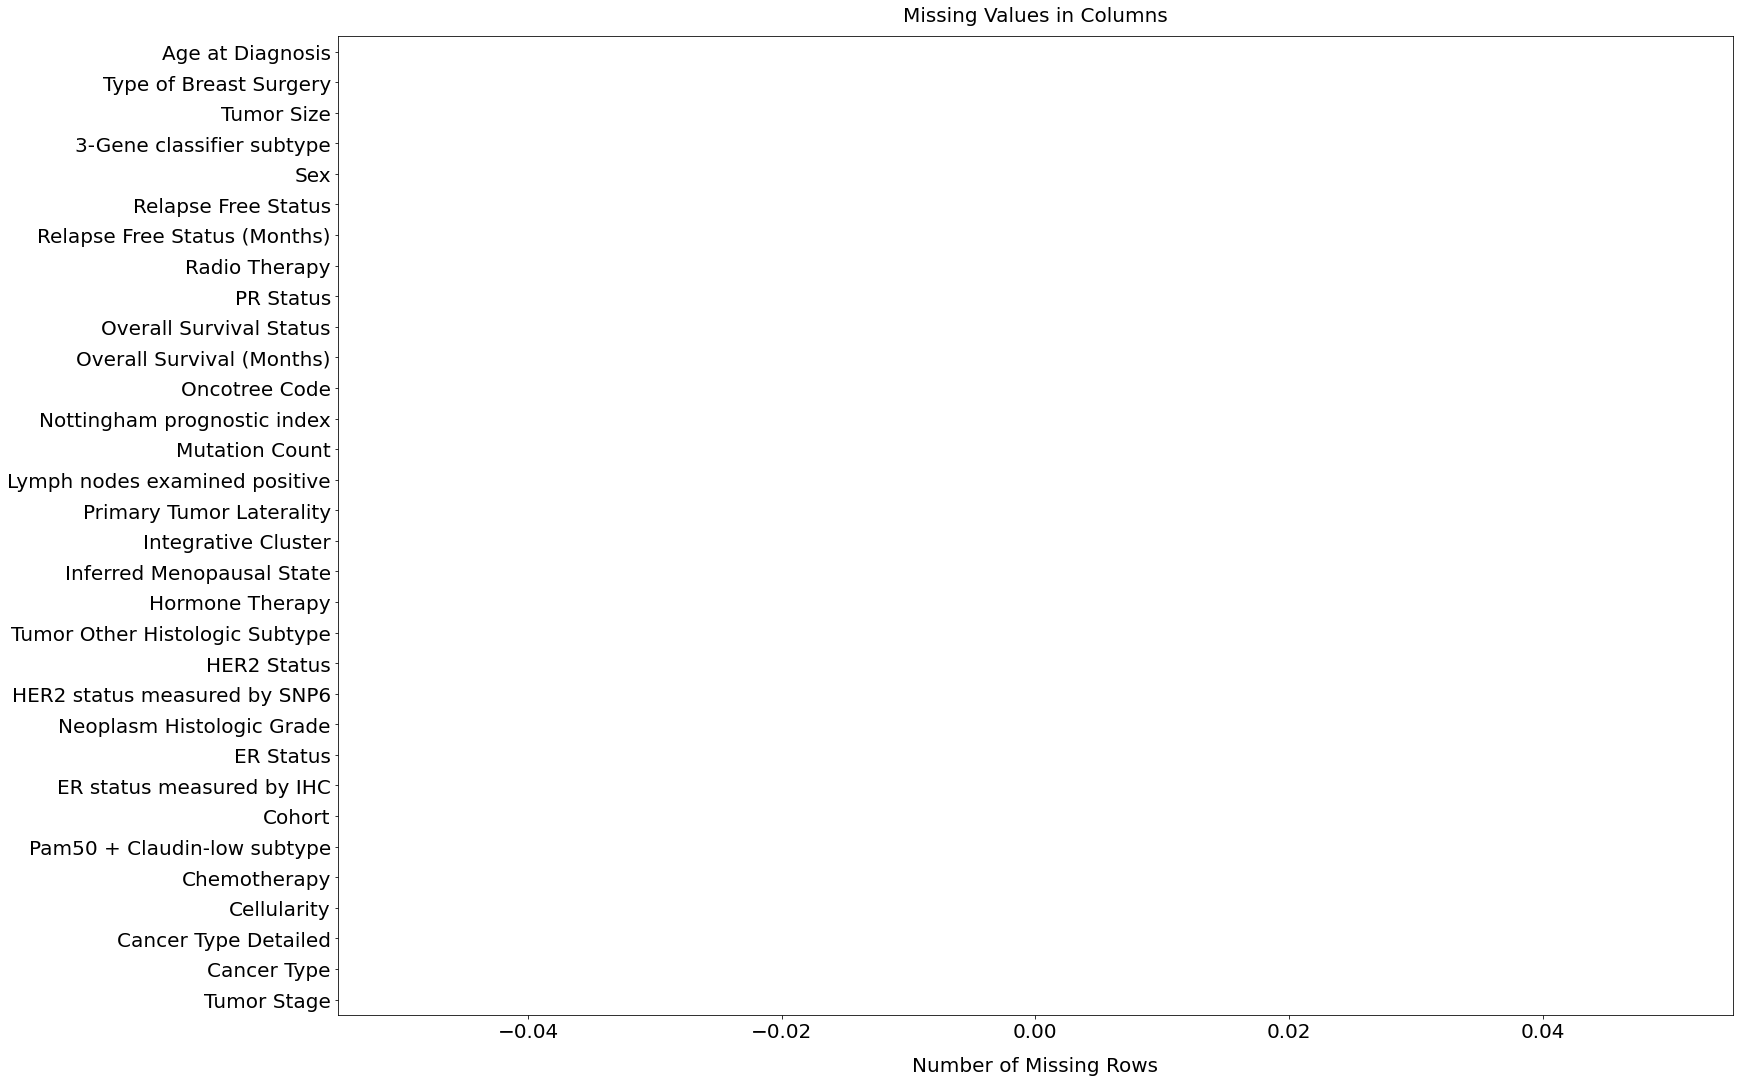

In [9]:
fig = plt.figure(figsize=(25, 18))

sns.barplot(x=data.isnull().sum().sort_values(ascending=False).values,
            y=data.isnull().sum().sort_values(ascending=False).index)
#             palette='Reds_d')

plt.xlabel('Number of Missing Rows', size=20, labelpad=15)
plt.ylabel('')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.title('Missing Values in Columns', size=20, pad=15)

plt.show()

In [10]:
# data.head()

Convert Categorical feature to numerical features

In [11]:
dictSurvival = {'Living': 0, 'Deceased': 1}
dictRelapse = {'Not Recurred': 0, 'Recurred': 1}
# data['Overall Survival Status'] = np.uint8(data['Overall Survival Status'].map(dictSurvival))
# data['Relapse Free Status'] = np.uint8(data['Relapse Free Status'].map(dictRelapse))

data['Overall Survival Status'] = data['Overall Survival Status'].map(dictSurvival)
data['Relapse Free Status'] = data['Relapse Free Status'].map(dictRelapse)

# data.head()

In [12]:
le = LabelEncoder()

List1 = ['Overall Survival Status', 'Relapse Free Status']
    

for col in data:
    if data[col].dtype != 'float64' and (col not in List1):
        data[col] = le.fit_transform(data[col])
        
pd.set_option('display.max_columns', None)
# data.head()

In [13]:
y = data[['Overall Survival Status']]
#y.head()

In [14]:
X = data.drop(columns=['Overall Survival Status'])
X.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Primary Tumor Laterality,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival (Months),PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage
0,75.65,1,0,2,0,0,6,1.0,1,1,3.0,2,0,0,1,0,0,1,10.0,5.0,6.044,2,140.500000,0,1,138.65,0,0,2,22.0,2.0
1,43.19,0,0,2,0,0,2,1.0,1,1,3.0,2,0,0,1,1,0,1,0.0,2.0,4.020,2,84.633333,1,1,83.52,0,0,0,10.0,1.0
2,48.87,1,0,2,0,1,3,1.0,1,1,2.0,2,0,0,1,1,0,1,1.0,2.0,4.030,2,163.700000,1,0,151.28,1,0,0,15.0,2.0
3,47.68,1,0,5,2,1,3,1.0,1,1,2.0,2,0,4,1,1,2,1,3.0,1.0,4.050,6,164.933333,1,1,162.76,0,0,1,25.0,2.0
4,76.97,1,0,5,0,1,3,1.0,1,1,3.0,2,0,4,1,0,0,1,8.0,2.0,6.080,6,41.366667,1,1,18.55,1,0,0,40.0,2.0


## Kaplan-Meier Analysis

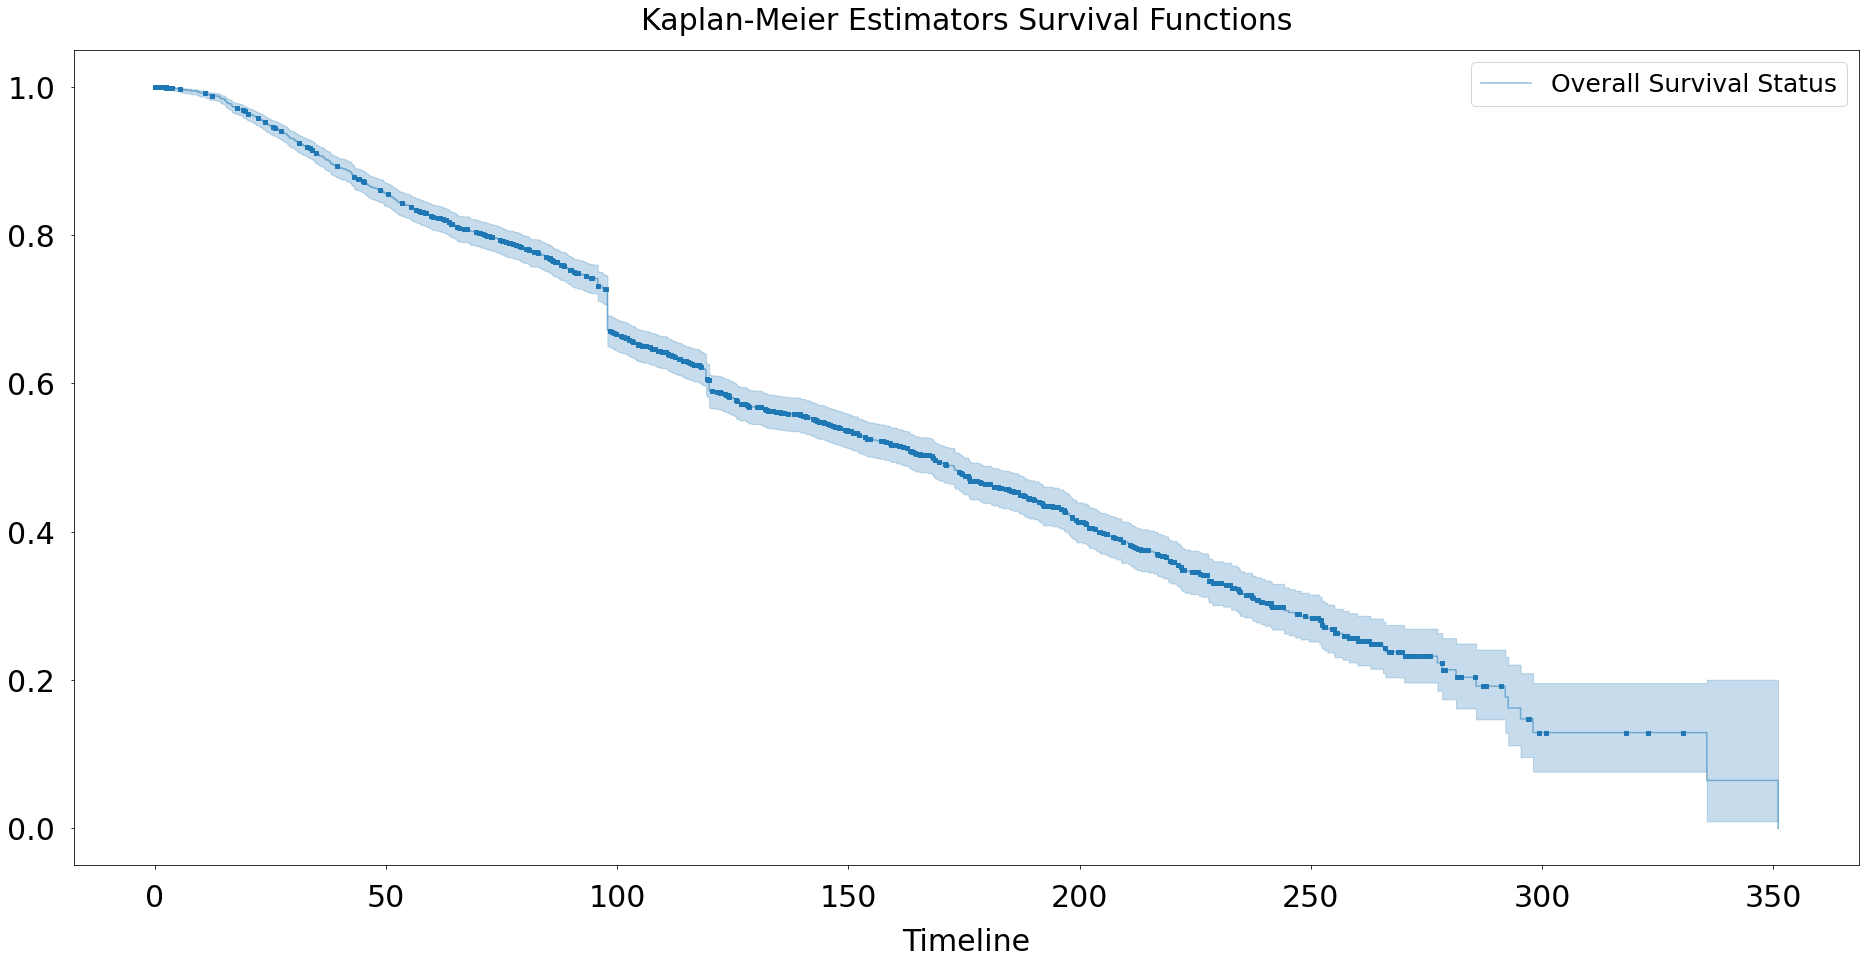

In [15]:
from lifelines import KaplanMeierFitter

df_train, df_test = train_test_split(data,
                                     test_size=0.2,
                                     stratify=data['Cancer Type Detailed'],
                                     shuffle=True,
                                     random_state=0)

fig = plt.figure(figsize=(32, 15))
T, E = df_train['Overall Survival (Months)'], df_train['Overall Survival Status']
kmf = KaplanMeierFitter()
kmf.fit(T, E)
kmf.plot(label='Overall Survival Status', alpha=0.5, show_censors=True, censor_styles={'ms': 4, 'marker': 's'})

plt.xlabel('Timeline', size=30, labelpad=15)
plt.ylabel('')
plt.tick_params(axis='x', labelsize=30, pad=15)
plt.tick_params(axis='y', labelsize=30, pad=15)
plt.legend(prop={'size': 25})
plt.title('Kaplan-Meier Estimators Survival Functions', size=30, pad=20)

plt.show()

## Feature Selection

Based on the correlation heatmap below, we found **Cellularity** and **Integrative Cluster** are perfectly correlated so I chose to drop one of them. Since breast cancer patients are all female so the column of sex makes no sense in this case.

<AxesSubplot:>

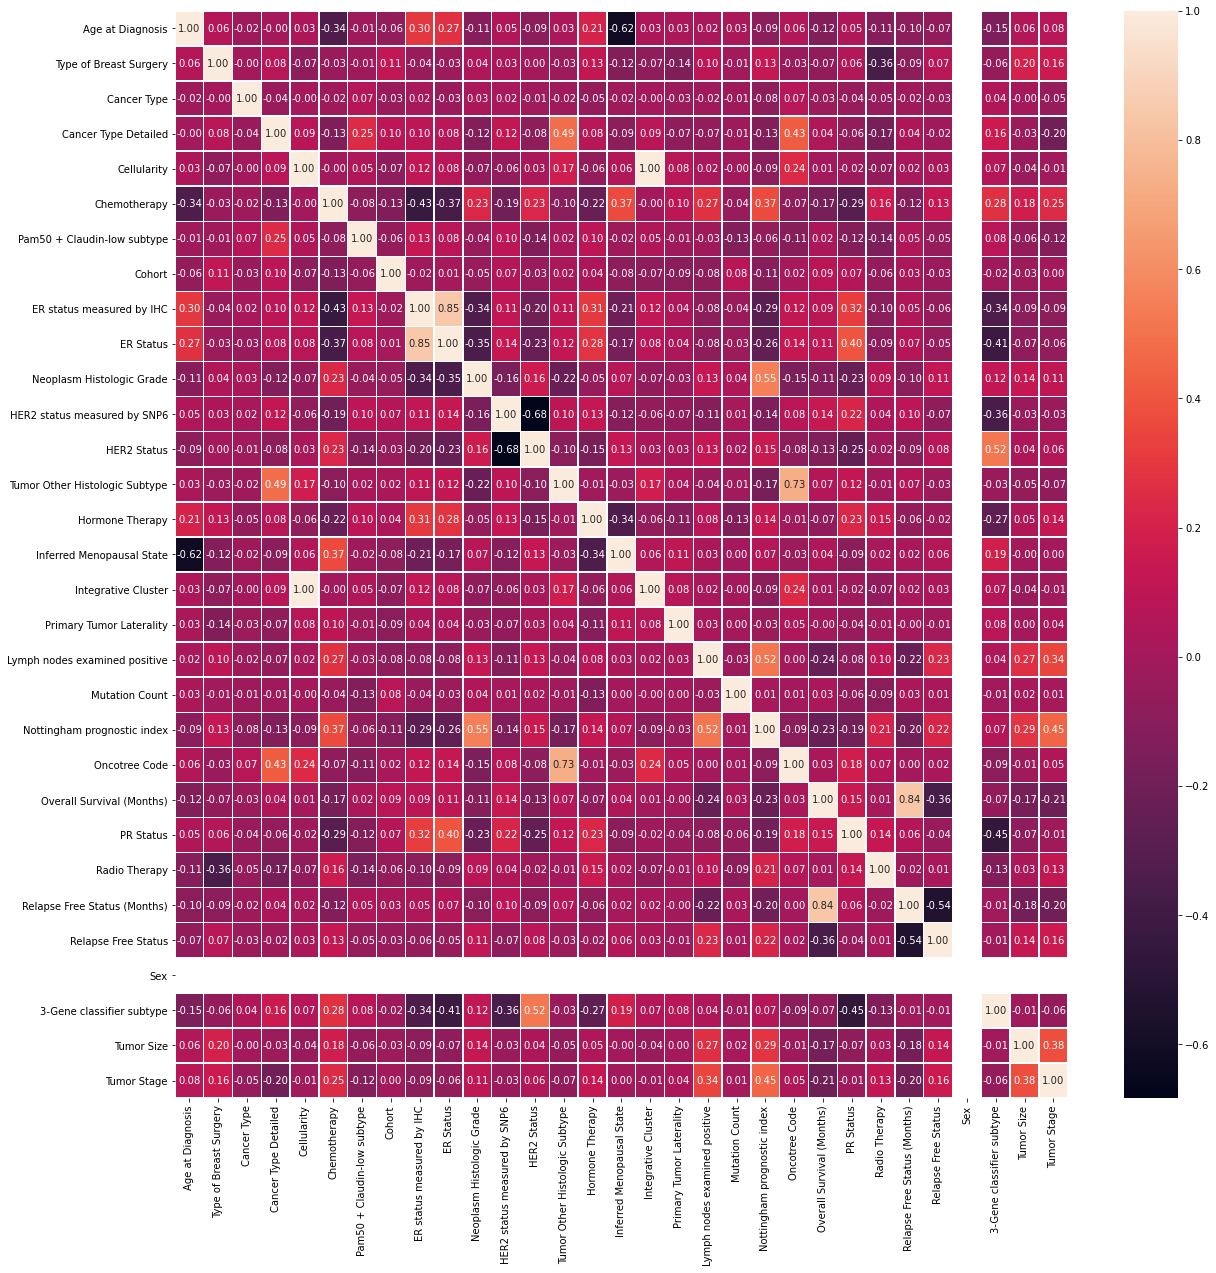

In [16]:
#correlation map
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)

In [17]:
drop_list1 = ['Integrative Cluster', 'Sex']
X.drop(columns=drop_list1, inplace=True)

In [18]:
X.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,Neoplasm Histologic Grade,HER2 status measured by SNP6,HER2 Status,Tumor Other Histologic Subtype,Hormone Therapy,Inferred Menopausal State,Primary Tumor Laterality,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival (Months),PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,3-Gene classifier subtype,Tumor Size,Tumor Stage
0,75.65,1,0,2,0,0,6,1.0,1,1,3.0,2,0,0,1,0,1,10.0,5.0,6.044,2,140.500000,0,1,138.65,0,2,22.0,2.0
1,43.19,0,0,2,0,0,2,1.0,1,1,3.0,2,0,0,1,1,1,0.0,2.0,4.020,2,84.633333,1,1,83.52,0,0,10.0,1.0
2,48.87,1,0,2,0,1,3,1.0,1,1,2.0,2,0,0,1,1,1,1.0,2.0,4.030,2,163.700000,1,0,151.28,1,0,15.0,2.0
3,47.68,1,0,5,2,1,3,1.0,1,1,2.0,2,0,4,1,1,1,3.0,1.0,4.050,6,164.933333,1,1,162.76,0,1,25.0,2.0
4,76.97,1,0,5,0,1,3,1.0,1,1,3.0,2,0,4,1,0,1,8.0,2.0,6.080,6,41.366667,1,1,18.55,1,0,40.0,2.0


### Method 1: Recursive Feature Elimination (RFE)

#### Random Forest

In [19]:
X_1 = X
y_1 = y

In [20]:
clf_rf = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf, n_features_to_select=15, step=1)
rfe = rfe.fit(X_1, y_1)

In [21]:
print('Best 15 features by rfe:',X_1.columns[rfe.support_])

Best 15 features by rfe: Index(['Age at Diagnosis', 'Cellularity', 'Pam50 + Claudin-low subtype',
       'Cohort', 'Neoplasm Histologic Grade', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Radio Therapy',
       'Relapse Free Status (Months)', 'Relapse Free Status',
       '3-Gene classifier subtype', 'Tumor Size'],
      dtype='object')


#### Random Forest with cross validation

In [22]:
X_1 = X
y_1 = y

In [23]:
clf_rf = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_1, y_1)

In [24]:
print('Best features:', X_1.columns[rfecv.support_])

Best features: Index(['Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type',
       'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Primary Tumor Laterality',
       'Lymph nodes examined positive', 'Mutation Count',
       'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'PR Status', 'Radio Therapy',
       'Relapse Free Status (Months)', 'Relapse Free Status',
       '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage'],
      dtype='object')


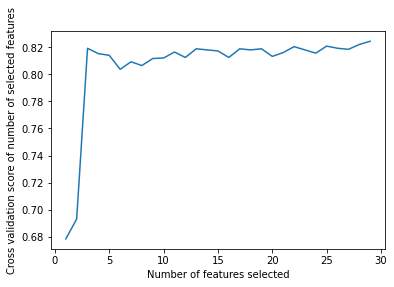

In [25]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Method 2: Sequential Feature Selection (SFS)

In [26]:
X_1 = X
y_1 = y

In [27]:
pipe = make_pipeline(StandardScaler(),
                     KNeighborsClassifier(n_neighbors=5))

sfs1 = SFS(pipe, 
           k_features='best', 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=10)

sfs1 = sfs1.fit(X_1, y_1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    2.8s finished

[2021-12-06 20:45:35] Features: 1/29 -- score: 0.7908366533864541[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    2.6s finished

[2021-12-06 20:45:37] Features: 2/29 -- score: 0.7903792828685259[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    2.2s finished

[2021-12-06 20:45:40] Features: 3/29 -- score: 0.8087553784860557[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s finished

[2021-12-06 20:46:29] Features: 28/29 -- score: 0.7740557768924303[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

[2021-12-06 20:46:29] Features: 29/29 -- score: 0.7636637450199204

In [28]:
# print('Best features :', x_train.columns[sfs1.subsets_])
sfs1.subsets_

{1: {'feature_idx': (25,),
  'cv_scores': array([0.78087649, 0.77689243, 0.74900398, 0.74501992, 0.7250996 ,
         0.74900398, 0.7689243 , 0.71314741, 0.90039841, 1.        ]),
  'avg_score': 0.7908366533864541,
  'feature_names': ('Relapse Free Status',)},
 2: {'feature_idx': (0, 25),
  'cv_scores': array([0.82868526, 0.80876494, 0.71314741, 0.7689243 , 0.78087649,
         0.77689243, 0.75697211, 0.7689243 , 0.84860558, 0.852     ]),
  'avg_score': 0.7903792828685259,
  'feature_names': ('Age at Diagnosis', 'Relapse Free Status')},
 3: {'feature_idx': (0, 21, 25),
  'cv_scores': array([0.85258964, 0.78884462, 0.6812749 , 0.78087649, 0.80478088,
         0.74900398, 0.71314741, 0.82071713, 0.92031873, 0.976     ]),
  'avg_score': 0.8087553784860557,
  'feature_names': ('Age at Diagnosis',
   'Overall Survival (Months)',
   'Relapse Free Status')},
 4: {'feature_idx': (0, 21, 24, 25),
  'cv_scores': array([0.83266932, 0.78486056, 0.70517928, 0.79681275, 0.82071713,
         0.788844

In [29]:
sfs1.k_feature_names_

('Age at Diagnosis',
 'Cancer Type',
 'Pam50 + Claudin-low subtype',
 'ER status measured by IHC',
 'HER2 status measured by SNP6',
 'Hormone Therapy',
 'Inferred Menopausal State',
 'Lymph nodes examined positive',
 'Overall Survival (Months)',
 'PR Status',
 'Relapse Free Status (Months)',
 'Relapse Free Status',
 '3-Gene classifier subtype')

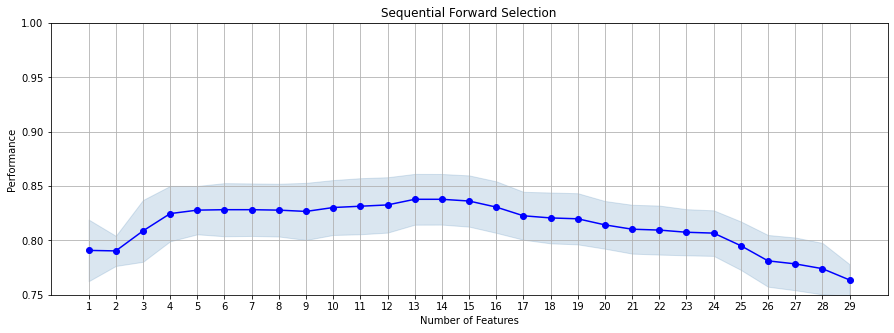

In [30]:
fig1 = plot_sfs(sfs1.get_metric_dict(confidence_interval=0.95), kind='std_err', figsize=(15, 5))

plt.ylim([0.75, 1])
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

### Method 3: Principal Component Analysis

In [31]:
X_1 = X
y_1 = y

In [32]:
# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.3, random_state=42)

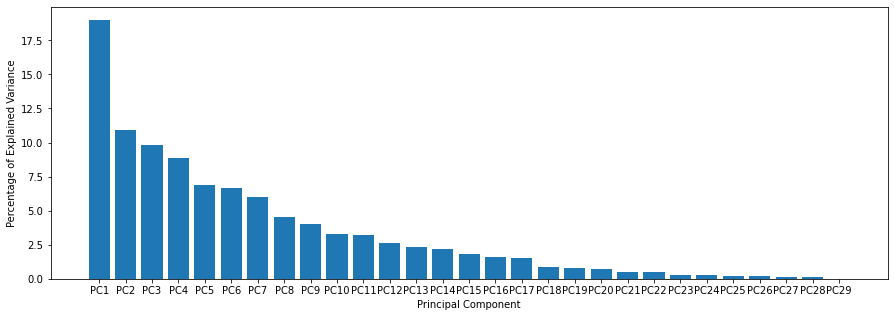

In [33]:
# Normalization
X_train_N = (X_train-X_train.mean())/(X_train.max()-X_train.min())
X_test_N = (X_test-X_test.mean())/(X_test.max()-X_test.min())

pca = PCA()
pca.fit(X_train_N)

pca_data = pca.transform(X_train_N)
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.figure(figsize=(15, 5))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.show()

Therefore, we eventually select 11 features:

    'Age at Diagnosis',
    'Pam50 + Claudin-low subtype',
    'Cohort',
    'Inferred Menopausal State',
    'Lymph nodes examined positive',
    'Mutation Count',
    'Nottingham prognostic index',
    'Overall Survival (Months)',
    'Relapse Free Status (Months)',
    'Relapse Free Status',
    'Tumor Size'

In [34]:
feature_list = ['Age at Diagnosis',
    'Pam50 + Claudin-low subtype',
    'Cohort',
    'Inferred Menopausal State',
    'Lymph nodes examined positive',
    'Mutation Count',
    'Nottingham prognostic index',
    'Overall Survival (Months)',
    'Relapse Free Status (Months)',
    'Relapse Free Status',
    'Tumor Size']
X = X[feature_list]
X

,Age at Diagnosis,Pam50 + Claudin-low subtype,Cohort,Inferred Menopausal State,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Relapse Free Status (Months),Relapse Free Status,Tumor Size
0,75.650000,6,1.0,0,10.0,5.0,6.044,140.500000,138.650000,0,22.0
1,43.190000,2,1.0,1,0.0,2.0,4.020,84.633333,83.520000,0,10.0
2,48.870000,3,1.0,1,1.0,2.0,4.030,163.700000,151.280000,1,15.0
3,47.680000,3,1.0,1,3.0,1.0,4.050,164.933333,162.760000,0,25.0
4,76.970000,3,1.0,0,8.0,2.0,6.080,41.366667,18.550000,1,40.0
...,...,...,...,...,...,...,...,...,...,...,...
2504,70.050000,6,1.0,0,0.0,2.0,2.540,119.183333,4.930000,1,27.0
2505,63.600000,6,1.0,0,0.0,4.0,4.560,119.183333,16.180000,1,28.0
2506,57.462787,6,3.0,0,0.0,6.0,4.050,142.975000,149.118281,0,25.0
2507,57.462787,6,3.0,0,0.0,7.0,4.050,142.975000,149.118281,0,25.0


In [35]:
y

,Overall Survival Status
0,0
1,0
2,1
3,0
4,1
...,...
2504,1
2505,1
2506,0
2507,0


# Model Training

#### Dataset Split

In [36]:
X_temp, X_test, y_temp, y_test = \
        train_test_split(X, y, test_size=0.3, 
                         shuffle=True, random_state=123, stratify=y)


In [37]:
X_train, X_valid, y_train, y_valid = \
        train_test_split(X_temp, y_temp, test_size=0.2,
                         shuffle=True, random_state=123, stratify=y_temp)

In [38]:
print('Train/Valid/Test sizes:', y_train.shape[0], y_valid.shape[0], y_test.shape[0])

Train/Valid/Test sizes: 1404 352 753


### 1. K-Nearest Neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


pipe = make_pipeline(StandardScaler(),
                     KNeighborsClassifier())

param_grid = {'kneighborsclassifier__n_neighbors':[20,50,100,150,200],
              'kneighborsclassifier__p': [1, 2]}

grid = GridSearchCV(pipe,
                    param_grid = param_grid,
                    refit = True,
                    cv=5)

grid.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [20, 50, 100, 150,
                                                               200],
                         'kneighborsclassifier__p': [1, 2]})

In [40]:
print(grid.best_score_)
print(grid.best_params_)

0.8340238942552111
{'kneighborsclassifier__n_neighbors': 50, 'kneighborsclassifier__p': 1}


In [41]:
knn_clf = grid.best_estimator_
#clf.fit(X_train, y_train)
print('Test accuracy: %.5f%%' % (knn_clf.score(X_test, y_test)*100))

Test accuracy: 83.79814%


In [42]:
# update the n_neighbors waiting for selection

# param_grid = {'kneighborsclassifier__n_neighbors':[20,30,40,50,60,70],
#               'kneighborsclassifier__p': [1, 2]}

# grid = GridSearchCV(pipe,
#                     param_grid = param_grid,
#                     refit = True,
#                     cv=5)

# grid.fit(X_train,y_train)


In [43]:
# print(grid.best_score_)
# print(grid.best_params_)

# clf = grid.best_estimator_
# #clf.fit(X_train, y_train)
# print('Test accuracy: %.5f%%' % (clf.score(X_test, y_test)*100))

In [44]:
# update the n_neighbors waiting for selection

# param_grid = {'kneighborsclassifier__n_neighbors':[47,48,49,50,51,52,53],
#               'kneighborsclassifier__p': [1, 2]}

# grid = GridSearchCV(pipe,
#                     param_grid = param_grid,
#                     refit = True,
#                     cv=5)

# grid.fit(X_train,y_train)

In [45]:
# print(grid.best_score_)
# print(grid.best_params_)

# clf = grid.best_estimator_
# #clf.fit(X_train, y_train)
# print('Test accuracy: %.5f%%' % (clf.score(X_test, y_test)*100))

#### Confusion Matrix using k=50

[[304  46]
 [ 76 327]]


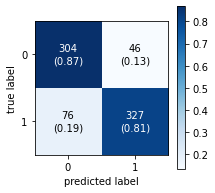

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

from mlxtend.evaluate import confusion_matrix
#or
#from sklearn.metrics import confusion_matrix

y_pred = knn_clf.predict(X_test)

y_test_l = y_test.iloc[:, 0].to_numpy()

confmat = confusion_matrix(y_test_l, y_pred)

print(confmat)

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plot_confusion_matrix(conf_mat=confmat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize=(3, 3))
plt.show()

In [47]:
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score, matthews_corrcoef


print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
print('MCC: %.3f' % matthews_corrcoef(y_true=y_test, y_pred=y_pred))

Accuracy: 0.838
Precision: 0.877
Recall: 0.811
F1: 0.843
MCC: 0.678


In [48]:
from mlxtend.evaluate import BootstrapOutOfBag
from sklearn.model_selection import cross_val_score

bootstrap_scores = \
    cross_val_score(knn_clf, X_train, y_train, 
                    cv=BootstrapOutOfBag(n_splits=5, random_seed=123))

print('Bootstrap scores', bootstrap_scores)
print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))

Bootstrap scores [0.83172147 0.81349206 0.80346821 0.8460076  0.83269962]
Mean Bootstrap score 0.8254777931876983
Score Std 0.01510424435107355


In [49]:
bootstrap_scores = \
    cross_val_score(knn_clf, X_train, y_train, 
                    cv=BootstrapOutOfBag(n_splits=200, random_seed=123))

print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))

lower = np.percentile(bootstrap_scores, 2.5)
upper = np.percentile(bootstrap_scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

Mean Bootstrap score 0.8297258148770819
Score Std 0.01580187266787264
95% Confidence interval: [80.00, 86.35]


#### Based on multiple tries on hyperparameter tuning of the number of neighbors, we decided to use k = 50.

### 2. Decison Tree w/ GridSearchCV

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[1,10,50,100,500,None],
             'criterion':['gini','entropy']}

grid = GridSearchCV(estimator = DecisionTreeClassifier(random_state=123),
                   param_grid = param_grid,
                   refit = True,
                   n_jobs=1,
                   verbose=2,
                   cv=10)

grid.fit(X_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END .......................criterion=gini, max_depth=10; total time=   0.0s
[CV] END .......................criterion=gini

[CV] END ..................criterion=entropy, max_depth=None; total time=   0.0s
[CV] END ..................criterion=entropy, max_depth=None; total time=   0.0s
[CV] END ..................criterion=entropy, max_depth=None; total time=   0.0s
[CV] END ..................criterion=entropy, max_depth=None; total time=   0.0s
[CV] END ..................criterion=entropy, max_depth=None; total time=   0.0s
[CV] END ..................criterion=entropy, max_depth=None; total time=   0.0s
[CV] END ..................criterion=entropy, max_depth=None; total time=   0.0s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 10, 50, 100, 500, None]},
             verbose=2)

In [51]:
print(grid.best_score_)
print(grid.best_params_)

tree_clf = grid.best_estimator_
#clf.fit(X_train, y_train)
print('Test accuracy: %.5f%%' % (tree_clf.score(X_test, y_test)*100))

0.8298328267477204
{'criterion': 'entropy', 'max_depth': 10}
Test accuracy: 80.74369%


#### Confusion Matrix Decision Tree w Grid Search

[[288  62]
 [ 83 320]]


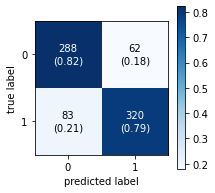

In [52]:
y_pred = tree_clf.predict(X_test)

y_test_l = y_test.iloc[:, 0].to_numpy()

confmat = confusion_matrix(y_test_l, y_pred)

print(confmat)

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plot_confusion_matrix(conf_mat=confmat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize=(3, 3))
plt.show()

In [53]:
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score, matthews_corrcoef


print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
print('MCC: %.3f' % matthews_corrcoef(y_true=y_test, y_pred=y_pred))

Accuracy: 0.807
Precision: 0.838
Recall: 0.794
F1: 0.815
MCC: 0.615


#### Bootstrap Confidence Interval (Decision Tree w Grid Search)

In [54]:
from mlxtend.evaluate import BootstrapOutOfBag
from sklearn.model_selection import cross_val_score

bootstrap_scores = \
    cross_val_score(tree_clf, X_train, y_train, 
                    cv=BootstrapOutOfBag(n_splits=5, random_seed=123))

print('Bootstrap scores', bootstrap_scores)
print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))

bootstrap_scores = \
    cross_val_score(tree_clf, X_train, y_train, 
                    cv=BootstrapOutOfBag(n_splits=200, random_seed=123))

print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))

lower = np.percentile(bootstrap_scores, 2.5)
upper = np.percentile(bootstrap_scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

Bootstrap scores [0.83945841 0.80952381 0.7938343  0.82319392 0.8365019 ]
Mean Bootstrap score 0.8205024675330546
Score Std 0.017054477078638934
Mean Bootstrap score 0.8140724097403824
Score Std 0.018020961705287112
95% Confidence interval: [78.21, 84.87]


### 2. Decison Tree w/ RandomizedSearchCV

In [55]:
import scipy.stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

params =  {
    'min_samples_split': scipy.stats.randint(2, 12),
    'min_impurity_decrease': scipy.stats.uniform(0.0, 0.5),
    'max_depth': [1,10,50,100,None]
}


randomizedSearch = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=123),
    param_distributions=params,
    n_iter=50,
    cv=10,
    verbose=2,
    n_jobs=1)

randomizedSearch.fit(X_train, y_train)


Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END max_depth=100, min_impurity_decrease=0.44285272602919157, min_samples_split=10; total time=   0.0s
[CV] END max_depth=100, min_impurity_decrease=0.44285272602919157, min_samples_split=10; total time=   0.0s
[CV] END max_depth=100, min_impurity_decrease=0.44285272602919157, min_samples_split=10; total time=   0.0s
[CV] END max_depth=100, min_impurity_decrease=0.44285272602919157, min_samples_split=10; total time=   0.0s
[CV] END max_depth=100, min_impurity_decrease=0.44285272602919157, min_samples_split=10; total time=   0.0s
[CV] END max_depth=100, min_impurity_decrease=0.44285272602919157, min_samples_split=10; total time=   0.0s
[CV] END max_depth=100, min_impurity_decrease=0.44285272602919157, min_samples_split=10; total time=   0.0s
[CV] END max_depth=100, min_impurity_decrease=0.44285272602919157, min_samples_split=10; total time=   0.0s
[CV] END max_depth=100, min_impurity_decrease=0.44285272602919157, min_sa

[CV] END max_depth=100, min_impurity_decrease=0.14479998621310441, min_samples_split=3; total time=   0.0s
[CV] END max_depth=100, min_impurity_decrease=0.14479998621310441, min_samples_split=3; total time=   0.0s
[CV] END max_depth=100, min_impurity_decrease=0.14479998621310441, min_samples_split=3; total time=   0.0s
[CV] END max_depth=100, min_impurity_decrease=0.14479998621310441, min_samples_split=3; total time=   0.0s
[CV] END max_depth=100, min_impurity_decrease=0.14479998621310441, min_samples_split=3; total time=   0.0s
[CV] END max_depth=100, min_impurity_decrease=0.14479998621310441, min_samples_split=3; total time=   0.0s
[CV] END max_depth=100, min_impurity_decrease=0.14479998621310441, min_samples_split=3; total time=   0.0s
[CV] END max_depth=50, min_impurity_decrease=0.2321348516452772, min_samples_split=9; total time=   0.0s
[CV] END max_depth=50, min_impurity_decrease=0.2321348516452772, min_samples_split=9; total time=   0.0s
[CV] END max_depth=50, min_impurity_decre

[CV] END max_depth=50, min_impurity_decrease=0.03642311118995267, min_samples_split=7; total time=   0.0s
[CV] END max_depth=50, min_impurity_decrease=0.03642311118995267, min_samples_split=7; total time=   0.0s
[CV] END max_depth=50, min_impurity_decrease=0.03642311118995267, min_samples_split=7; total time=   0.0s
[CV] END max_depth=50, min_impurity_decrease=0.03642311118995267, min_samples_split=7; total time=   0.0s
[CV] END max_depth=50, min_impurity_decrease=0.03642311118995267, min_samples_split=7; total time=   0.0s
[CV] END max_depth=50, min_impurity_decrease=0.03642311118995267, min_samples_split=7; total time=   0.0s
[CV] END max_depth=50, min_impurity_decrease=0.03642311118995267, min_samples_split=7; total time=   0.0s
[CV] END max_depth=50, min_impurity_decrease=0.03642311118995267, min_samples_split=7; total time=   0.0s
[CV] END max_depth=10, min_impurity_decrease=0.4996444509713549, min_samples_split=11; total time=   0.0s
[CV] END max_depth=10, min_impurity_decrease=0

[CV] END max_depth=None, min_impurity_decrease=0.20820036364703048, min_samples_split=6; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.20820036364703048, min_samples_split=6; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.20820036364703048, min_samples_split=6; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.20820036364703048, min_samples_split=6; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.20820036364703048, min_samples_split=6; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.20820036364703048, min_samples_split=6; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.20820036364703048, min_samples_split=6; total time=   0.0s
[CV] END max_depth=1, min_impurity_decrease=0.32954118221129713, min_samples_split=9; total time=   0.0s
[CV] END max_depth=1, min_impurity_decrease=0.32954118221129713, min_samples_split=9; total time=   0.0s
[CV] END max_depth=1, min_impurity

[CV] END max_depth=None, min_impurity_decrease=0.35036828093352046, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.35036828093352046, min_samples_split=3; total time=   0.0s
[CV] END max_depth=None, min_impurity_decrease=0.35036828093352046, min_samples_split=3; total time=   0.0s
[CV] END max_depth=100, min_impurity_decrease=0.4621156771746341, min_samples_split=7; total time=   0.0s
[CV] END max_depth=100, min_impurity_decrease=0.4621156771746341, min_samples_split=7; total time=   0.0s
[CV] END max_depth=100, min_impurity_decrease=0.4621156771746341, min_samples_split=7; total time=   0.0s
[CV] END max_depth=100, min_impurity_decrease=0.4621156771746341, min_samples_split=7; total time=   0.0s
[CV] END max_depth=100, min_impurity_decrease=0.4621156771746341, min_samples_split=7; total time=   0.0s
[CV] END max_depth=100, min_impurity_decrease=0.4621156771746341, min_samples_split=7; total time=   0.0s
[CV] END max_depth=100, min_impurity_dec

[CV] END max_depth=10, min_impurity_decrease=0.16708081139935976, min_samples_split=11; total time=   0.0s
[CV] END max_depth=10, min_impurity_decrease=0.16708081139935976, min_samples_split=11; total time=   0.0s
[CV] END max_depth=10, min_impurity_decrease=0.16708081139935976, min_samples_split=11; total time=   0.0s
[CV] END max_depth=10, min_impurity_decrease=0.16708081139935976, min_samples_split=11; total time=   0.0s
[CV] END max_depth=10, min_impurity_decrease=0.16708081139935976, min_samples_split=11; total time=   0.0s
[CV] END max_depth=10, min_impurity_decrease=0.16708081139935976, min_samples_split=11; total time=   0.0s
[CV] END max_depth=10, min_impurity_decrease=0.16708081139935976, min_samples_split=11; total time=   0.0s
[CV] END max_depth=10, min_impurity_decrease=0.16708081139935976, min_samples_split=11; total time=   0.0s
[CV] END max_depth=10, min_impurity_decrease=0.16708081139935976, min_samples_split=11; total time=   0.0s
[CV] END max_depth=None, min_impurity

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=123),
                   n_iter=50, n_jobs=1,
                   param_distributions={'max_depth': [1, 10, 50, 100, None],
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019CF5472310>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019CF53D3EB0>},
                   verbose=2)

In [56]:
print(randomizedSearch.best_score_)
print(randomizedSearch.best_params_)

tree_random_clf = randomizedSearch.best_estimator_
#clf.fit(X_train, y_train)
print('Test accuracy: %.5f%%' % (tree_random_clf.score(X_test, y_test)*100))

0.7863525835866261
{'max_depth': 1, 'min_impurity_decrease': 0.03921665618635917, 'min_samples_split': 8}
Test accuracy: 79.54847%


#### Confusion Matrix Decision Tree w/ RandomizedSearchCV

[[321  29]
 [125 278]]


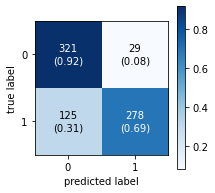

In [57]:
y_pred = tree_random_clf.predict(X_test)

y_test_l = y_test.iloc[:, 0].to_numpy()

confmat = confusion_matrix(y_test_l, y_pred)

print(confmat)

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plot_confusion_matrix(conf_mat=confmat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize=(3, 3))
plt.show()

In [58]:
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score, matthews_corrcoef


print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
print('MCC: %.3f' % matthews_corrcoef(y_true=y_test, y_pred=y_pred))

Accuracy: 0.795
Precision: 0.906
Recall: 0.690
F1: 0.783
MCC: 0.616


#### Bootstrap Confidence Interval (Decision Tree w/ RandomizedSearchCV)

In [59]:
from mlxtend.evaluate import BootstrapOutOfBag
from sklearn.model_selection import cross_val_score

bootstrap_scores = \
    cross_val_score(tree_random_clf, X_train, y_train, 
                    cv=BootstrapOutOfBag(n_splits=5, random_seed=123))

print('Bootstrap scores', bootstrap_scores)
print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))

bootstrap_scores = \
    cross_val_score(tree_random_clf, X_train, y_train, 
                    cv=BootstrapOutOfBag(n_splits=200, random_seed=123))

print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))

lower = np.percentile(bootstrap_scores, 2.5)
upper = np.percentile(bootstrap_scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

Bootstrap scores [0.81237911 0.7718254  0.77842004 0.80418251 0.78136882]
Mean Bootstrap score 0.7896351752821944
Score Std 0.015749359479665326
Mean Bootstrap score 0.7850132345476447
Score Std 0.013959788206790029
95% Confidence interval: [76.06, 81.30]


### 3. Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [5, 10],
    'n_estimators': [100, 200, 300, 1000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


{'max_depth': 80, 'max_features': 5, 'n_estimators': 1000}

In [61]:
print(grid_search.best_score_)
print(grid_search.best_params_)

forest_clf = grid_search.best_estimator_
#clf.fit(X_train, y_train)
print('Test accuracy: %.5f%%' % (forest_clf.score(X_test, y_test)*100))

0.8610981189628877
{'max_depth': 80, 'max_features': 5, 'n_estimators': 1000}
Test accuracy: 85.25896%


In [62]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators=100,
                                random_state=1)

forest.fit(X_train, y_train)
    
print("Training Accuracy: %0.5f" % forest.score(X_train, y_train))
print("Validation Accuracy: %0.5f" % forest.score(X_valid, y_valid))
print("Test Accuracy: %0.5f" % forest.score(X_test, y_test))

Training Accuracy: 1.00000
Validation Accuracy: 0.88068
Test Accuracy: 0.84595


#### Bootstrap Confidence Interval (Random Forest)

In [63]:
from mlxtend.evaluate import BootstrapOutOfBag
from sklearn.model_selection import cross_val_score

bootstrap_scores = \
    cross_val_score(forest, X_train, y_train, 
                    cv=BootstrapOutOfBag(n_splits=5, random_seed=123))

print('Bootstrap scores', bootstrap_scores)
print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))

bootstrap_scores = \
    cross_val_score(forest, X_train, y_train, 
                    cv=BootstrapOutOfBag(n_splits=200, random_seed=123))

print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))

lower = np.percentile(bootstrap_scores, 2.5)
upper = np.percentile(bootstrap_scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

Bootstrap scores [0.86073501 0.83928571 0.81888247 0.85361217 0.86882129]
Mean Bootstrap score 0.84826733006285
Score Std 0.0176103114369917
Mean Bootstrap score 0.8519017468510077
Score Std 0.013950290726209099
95% Confidence interval: [82.69, 87.65]


#### Confusion Matrix

[[302  48]
 [ 68 335]]


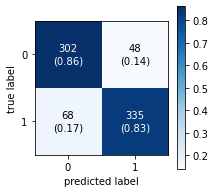

In [64]:
y_pred = forest.predict(X_test)

y_test_l = y_test.iloc[:, 0].to_numpy()

confmat = confusion_matrix(y_test_l, y_pred)

print(confmat)

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plot_confusion_matrix(conf_mat=confmat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize=(3, 3))
plt.show()

In [65]:
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score, matthews_corrcoef


print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
print('MCC: %.3f' % matthews_corrcoef(y_true=y_test, y_pred=y_pred))

Accuracy: 0.846
Precision: 0.875
Recall: 0.831
F1: 0.852
MCC: 0.693


#### Extra Trees

In [66]:
from sklearn.ensemble import ExtraTreesClassifier


extra_tree = ExtraTreesClassifier(n_estimators=100,
                              random_state=1)

extra_tree.fit(X_train, y_train)
    
    
print("Training Accuracy: %0.5f" % extra_tree.score(X_train, y_train))
print("Validation Accuracy: %0.5f" % extra_tree.score(X_valid, y_valid))
print("Test Accuracy: %0.5f" % extra_tree.score(X_test, y_test))

Training Accuracy: 1.00000
Validation Accuracy: 0.86932
Test Accuracy: 0.85525


#### Bootstrap Confidence Interval (Extra Trees)

In [67]:
from mlxtend.evaluate import BootstrapOutOfBag
from sklearn.model_selection import cross_val_score

bootstrap_scores = \
    cross_val_score(extra_tree, X_train, y_train, 
                    cv=BootstrapOutOfBag(n_splits=5, random_seed=123))

print('Bootstrap scores', bootstrap_scores)
print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))

bootstrap_scores = \
    cross_val_score(extra_tree, X_train, y_train, 
                    cv=BootstrapOutOfBag(n_splits=200, random_seed=123))

print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))

lower = np.percentile(bootstrap_scores, 2.5)
upper = np.percentile(bootstrap_scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

Bootstrap scores [0.86266925 0.84126984 0.83622351 0.85741445 0.85171103]
Mean Bootstrap score 0.8498576137893439
Score Std 0.009841925778688232
Mean Bootstrap score 0.8495682017569723
Score Std 0.01461434281686134
95% Confidence interval: [82.53, 87.78]


#### Confusion Matrix

[[302  48]
 [ 68 335]]


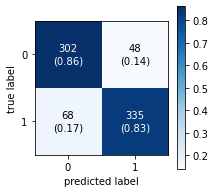

In [68]:
y_pred = forest.predict(X_test)

y_test_l = y_test.iloc[:, 0].to_numpy()

confmat = confusion_matrix(y_test_l, y_pred)

print(confmat)

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plot_confusion_matrix(conf_mat=confmat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize=(3, 3))
plt.show()

In [69]:
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score, matthews_corrcoef


print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
print('MCC: %.3f' % matthews_corrcoef(y_true=y_test, y_pred=y_pred))

Accuracy: 0.846
Precision: 0.875
Recall: 0.831
F1: 0.852
MCC: 0.693


### 4. XGBoost

In [70]:
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
import hyperopt.pyll.stochastic

In [71]:
hyperopt.pyll.stochastic.sample(hp.loguniform('test', 1e-5, 1)) # range e^{low} to e^{high}

1.4105096798691503

In [72]:
hyperopt.pyll.stochastic.sample(hp.qloguniform('test', 1e-5, 1, 0.1)) # rounded to 0.1

2.5

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import numpy as np



params =  {
        "n_estimators": hp.choice("n_estimators", [30, 50, 100, 300]),
        "learning_rate": hp.choice("learning_rate", [0.01, 0.05, 0.1]),
        "lambda": hp.loguniform("lambda", 1e-8, 1.0),
        "alpha": hp.loguniform("alpha", 1e-8, 1.0),
}


def optimization_objective(params):

    model = XGBClassifier(random_state=123, use_label_encoder=False, **params)
    model.fit(X_train, y_train)
    
    accuracies = cross_val_score(
        estimator=model, X=X_train, y=y_train, cv=10, n_jobs=-1)

    score = accuracies.mean()

    return {'loss':1-score, 'status': STATUS_OK}

In [74]:
trials = Trials()
best = fmin(fn=optimization_objective,
            space=params,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

[20:47:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:47:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:47:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:47:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:48:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [75]:
best

from hyperopt import space_eval

best_params = space_eval(params, best)
print(best_params)

{'alpha': 1.0442786797170198, 'lambda': 1.9839903959346572, 'learning_rate': 0.05, 'n_estimators': 100}


In [76]:
xgboost = XGBClassifier(random_state=123, use_label_encoder=False, **best_params)
xgboost.fit(X_train, y_train)

[20:48:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=1.0442786797170198, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              lambda=1.9839903959346572, learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=1.04427862, reg_lambda=1.98399043, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [77]:
print("Training Accuracy: %0.5f" % xgboost.score(X_train, y_train))
print("Validation Accuracy: %0.5f" % xgboost.score(X_valid, y_valid))
print("Test Accuracy: %0.5f" % xgboost.score(X_test, y_test))

Training Accuracy: 0.94373
Validation Accuracy: 0.86080
Test Accuracy: 0.86056


#### Confusion Matrix

[[306  44]
 [ 61 342]]


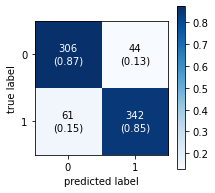

In [78]:
y_pred = xgboost.predict(X_test)

y_test_l = y_test.iloc[:, 0].to_numpy()

confmat = confusion_matrix(y_test_l, y_pred)

print(confmat)

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plot_confusion_matrix(conf_mat=confmat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize=(3, 3))
plt.show()

In [79]:
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score, matthews_corrcoef


print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
print('MCC: %.3f' % matthews_corrcoef(y_true=y_test, y_pred=y_pred))

Accuracy: 0.861
Precision: 0.886
Recall: 0.849
F1: 0.867
MCC: 0.721


#### Bootstrap Confidence Interval (XGBoost)

In [80]:
from mlxtend.evaluate import BootstrapOutOfBag
from sklearn.model_selection import cross_val_score

bootstrap_scores = \
    cross_val_score(xgboost, X_train, y_train, 
                    cv=BootstrapOutOfBag(n_splits=5, random_seed=123))

print('Bootstrap scores', bootstrap_scores)
print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))

bootstrap_scores = \
    cross_val_score(xgboost, X_train, y_train, 
                    cv=BootstrapOutOfBag(n_splits=200, random_seed=123))



[20:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:48:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:48:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[20:48:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:48:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [81]:
print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))

lower = np.percentile(bootstrap_scores, 2.5)
upper = np.percentile(bootstrap_scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

Mean Bootstrap score 0.8523030879650196
Score Std 0.014365576132083197
95% Confidence interval: [82.36, 88.21]


### 5. Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
logistic = GridSearchCV(estimator = LogisticRegression(max_iter = 1000),
                        param_grid = param_grid,
                        refit = True,
                        n_jobs = -1,
                        cv=10)

logistic.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [83]:
print(logistic.best_score_)
print(logistic.best_params_)

logistic_clf = logistic.best_estimator_
#clf.fit(X_train, y_train)
print('Test accuracy: %.5f%%' % (logistic_clf.score(X_test, y_test)*100))

0.8305116514690983
{'C': 10}
Test accuracy: 83.13413%


In [84]:
print("Training Accuracy: %0.5f" % logistic_clf.score(X_train, y_train))
print("Validation Accuracy: %0.5f" % logistic_clf.score(X_valid, y_valid))
print("Test Accuracy: %0.5f" % logistic_clf.score(X_test, y_test))

Training Accuracy: 0.83333
Validation Accuracy: 0.85511
Test Accuracy: 0.83134


#### Bootstrap Confidence Interval (Logistic Regression)

In [85]:
from mlxtend.evaluate import BootstrapOutOfBag
from sklearn.model_selection import cross_val_score

bootstrap_scores = \
    cross_val_score(logistic, X_train, y_train, 
                    cv=BootstrapOutOfBag(n_splits=5, random_seed=123))

print('Bootstrap scores', bootstrap_scores)
print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))

bootstrap_scores = \
    cross_val_score(logistic, X_train, y_train, 
                    cv=BootstrapOutOfBag(n_splits=200, random_seed=123))

print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))

lower = np.percentile(bootstrap_scores, 2.5)
upper = np.percentile(bootstrap_scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

Bootstrap scores [0.84526112 0.82142857 0.80924855 0.83840304 0.83840304]
Mean Bootstrap score 0.8305488663697845
Score Std 0.013241674015327238
Mean Bootstrap score 0.8272820075862513
Score Std 0.013528561006501539
95% Confidence interval: [80.04, 85.37]


#### Logistic with AdaBoost

In [86]:
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier(base_estimator=LogisticRegression(max_iter = 1000),
                           n_estimators=500,
                           algorithm='SAMME',
                           #n_jobs=1,
                           random_state=1)

boost.fit(X_train, y_train)
    
print("Training Accuracy: %0.5f" % boost.score(X_train, y_train))
print("Validation Accuracy: %0.5f" % boost.score(X_valid, y_valid))
print("Test Accuracy: %0.5f" % boost.score(X_test, y_test))

Training Accuracy: 0.82123
Validation Accuracy: 0.82386
Test Accuracy: 0.79283


#### Logistic with Bagging

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=LogisticRegression(max_iter=10000),
                        n_estimators=100,
                        oob_score=True,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=-1,
                        random_state=1)

bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=10000),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=1)

In [88]:
accuracy = [bagging.score(X_test, y_test)]

for i in range(9):
    bagging = BaggingClassifier(base_estimator=LogisticRegression(max_iter=10000),
                        n_estimators=10*i+10,
                        oob_score=True,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=-1,
                        random_state=1)
    bagging.fit(X_train, y_train)
    accuracy.append(bagging.score(X_test, y_test))


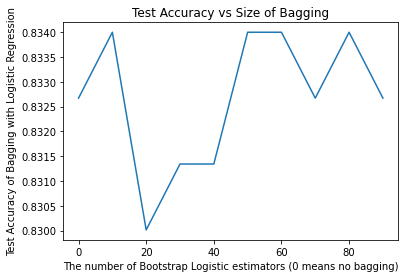

In [89]:
plt.plot(np.arange(0, 100, 10), accuracy)
plt.title("Test Accuracy vs Size of Bagging")
plt.xlabel("The number of Bootstrap Logistic estimators (0 means no bagging)")
plt.ylabel("Test Accuracy of Bagging with Logistic Regression")
plt.savefig("LogisticBagging")

In [90]:
print("OOB Accuracy: %0.5f" % bagging.oob_score_)
print("Validation Accuracy: %0.5f" % bagging.score(X_valid, y_valid))
print("Test Accuracy: %0.5f" % bagging.score(X_test, y_test))

OOB Accuracy: 0.82906
Validation Accuracy: 0.85795
Test Accuracy: 0.83267


#### Confusion Matrix

[[297  53]
 [ 73 330]]


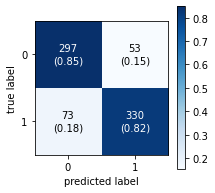

In [91]:
y_pred = bagging.predict(X_test)

y_test_l = y_test.iloc[:, 0].to_numpy()

confmat = confusion_matrix(y_test_l, y_pred)

print(confmat)

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plot_confusion_matrix(conf_mat=confmat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize=(3, 3))
plt.show()

In [92]:
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score, matthews_corrcoef


print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
print('MCC: %.3f' % matthews_corrcoef(y_true=y_test, y_pred=y_pred))

Accuracy: 0.833
Precision: 0.862
Recall: 0.819
F1: 0.840
MCC: 0.666


#### Bootstrap Confidence Interval (Logistic Regression - Bagging)

In [93]:
from mlxtend.evaluate import BootstrapOutOfBag
from sklearn.model_selection import cross_val_score

bootstrap_scores = \
    cross_val_score(bagging, X_train, y_train, 
                    cv=BootstrapOutOfBag(n_splits=5, random_seed=123))

print('Bootstrap scores', bootstrap_scores)
print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))

bootstrap_scores = \
    cross_val_score(bagging, X_train, y_train, 
                    cv=BootstrapOutOfBag(n_splits=200, random_seed=123))

print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))

lower = np.percentile(bootstrap_scores, 2.5)
upper = np.percentile(bootstrap_scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

Bootstrap scores [0.84139265 0.81746032 0.80924855 0.83840304 0.83840304]
Mean Bootstrap score 0.8289815211854181
Score Std 0.013066708166568087
Mean Bootstrap score 0.8277631965349255
Score Std 0.013713090870977532
95% Confidence interval: [80.04, 85.21]


#### 6. Naive Bayes

In [94]:
from sklearn.naive_bayes import GaussianNB
naiveBayes = GaussianNB()
naiveBayes.fit(X_train, y_train)

print("Training Accuracy: %0.5f" % naiveBayes.score(X_train, y_train))
print("Validation Accuracy: %0.5f" % naiveBayes.score(X_valid, y_valid))
print("Test Accuracy: %0.5f" % naiveBayes.score(X_test, y_test))

Training Accuracy: 0.79772
Validation Accuracy: 0.82102
Test Accuracy: 0.79814


[[284  66]
 [ 86 317]]


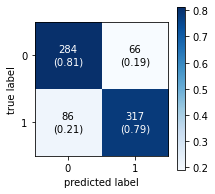

In [95]:
y_pred = naiveBayes.predict(X_test)

y_test_l = y_test.iloc[:, 0].to_numpy()

confmat = confusion_matrix(y_test_l, y_pred)

print(confmat)

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plot_confusion_matrix(conf_mat=confmat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize=(3, 3))
plt.show()

In [96]:
from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score, matthews_corrcoef


print('Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))
print('MCC: %.3f' % matthews_corrcoef(y_true=y_test, y_pred=y_pred))

Accuracy: 0.798
Precision: 0.828
Recall: 0.787
F1: 0.807
MCC: 0.597


#### Bootstrap Confidence Interval (Logistic Regression)

In [97]:
from mlxtend.evaluate import BootstrapOutOfBag
from sklearn.model_selection import cross_val_score

bootstrap_scores = \
    cross_val_score(naiveBayes, X_train, y_train, 
                    cv=BootstrapOutOfBag(n_splits=5, random_seed=123))

print('Bootstrap scores', bootstrap_scores)
print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))

bootstrap_scores = \
    cross_val_score(naiveBayes, X_train, y_train, 
                    cv=BootstrapOutOfBag(n_splits=200, random_seed=123))

print('Mean Bootstrap score', np.mean(bootstrap_scores))
print('Score Std', np.std(bootstrap_scores))

lower = np.percentile(bootstrap_scores, 2.5)
upper = np.percentile(bootstrap_scores, 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower, 100*upper))

Bootstrap scores [0.79883946 0.7797619  0.78612717 0.80418251 0.80608365]
Mean Bootstrap score 0.7949989381003413
Score Std 0.010323118892889109
Mean Bootstrap score 0.7943397081295227
Score Std 0.015631242781196306
95% Confidence interval: [76.39, 82.61]
